In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
import time

X = np.genfromtxt('data/X.csv', delimiter = ',')
Y = np.genfromtxt('data/Y.csv', delimiter = ',')

X = X[1:]
Y = Y[1:]

In [5]:
X[:,:-1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
Y.shape

(99989,)

In [7]:
X_comp, X_test, Y_comp, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
Xtr, Xva, Ytr, Yva = train_test_split(X_comp, Y_comp, test_size=0.2)
Xtr, Xva = Xtr[:,:-1], Xva[:,:-1]

Xtr, Ytr = shuffle(Xtr, Ytr)

In [8]:
Xtr.shape

(63992, 219)

In [9]:
Xva.shape

(15999, 219)

In [10]:
lr = LogisticRegression(C=2, penalty='l1')

mlp = MLPClassifier(max_iter=1000, hidden_layer_sizes=(100,), activation='identity', 
                            solver='sgd', alpha=0.01, learning_rate='adaptive')

gb = GradientBoostingClassifier(max_depth=3,loss="deviance",learning_rate=0.1,
                                 n_estimators=1500,min_samples_split=20,min_samples_leaf=9,
                                 max_features="sqrt", subsample=0.5)

In [ ]:
ensembled_model = VotingClassifier(estimators=[('lr', lr), ('nn', mlp), ('gb', gb)],
                         voting='soft', flatten_transform=True)
sizes = [50, 500, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
roc_scores = []
training_errors = []
validation_errors = []
training_scores = []
validation_scores = []

for size in sizes:
    print("training with size of", size)
    ensembled_model.fit(Xtr[:size], Ytr[:size])
    
    roc = roc_auc_score(Yva, ensembled_model.predict_proba(Xva)[:,1])
    training_score = ensembled_model.score(Xtr, Ytr)
    validation_score = ensembled_model.score(Xva, Yva)
    training_error = 1-training_score
    validation_error = 1-validation_score
    print("roc score:", roc, "training_score:", training_score, "validation_score:", validation_score, "training_error:", training_error, "validation_error:", validation_error)
    
    roc_scores.append(roc)
    training_scores.append(training_score)
    validation_scores.append(validation_score)
    training_errors.append(training_error)
    validation_errors.append(validation_error)

In [13]:
roc_scores

[0.6014817134609278,
 0.6785371009717186,
 0.7405522935515687,
 0.7469784442241709,
 0.7494635137679425,
 0.7512510560883673,
 0.7531143628208192,
 0.753898387351557,
 0.7553638159821785,
 0.75536043916281,
 0.7557097259436815,
 0.7558187195265832]

In [14]:
training_errors

[0.4227247155894487,
 0.3647330916364545,
 0.31593011626453305,
 0.31017939742467804,
 0.3073665458182273,
 0.30603825478184776,
 0.30416302037754717,
 0.30339729966245776,
 0.3019908738592324,
 0.30253781722715345,
 0.3023502937867233,
 0.3026315789473685]

In [15]:
validation_errors

[0.42977686105381585,
 0.3693355834739671,
 0.3234577161072567,
 0.3208325520345021,
 0.31733233327082944,
 0.31539471216951065,
 0.31670729420588783,
 0.31483217701106314,
 0.31370710669416835,
 0.31308206762922686,
 0.31383211450715665,
 0.31501968873054564]

In [16]:
training_scores

[0.5772752844105513,
 0.6352669083635455,
 0.684069883735467,
 0.689820602575322,
 0.6926334541817727,
 0.6939617452181522,
 0.6958369796224528,
 0.6966027003375422,
 0.6980091261407676,
 0.6974621827728466,
 0.6976497062132767,
 0.6973684210526315]

In [17]:
validation_scores

[0.5702231389461841,
 0.6306644165260329,
 0.6765422838927433,
 0.6791674479654979,
 0.6826676667291706,
 0.6846052878304894,
 0.6832927057941122,
 0.6851678229889369,
 0.6862928933058317,
 0.6869179323707731,
 0.6861678854928434,
 0.6849803112694544]

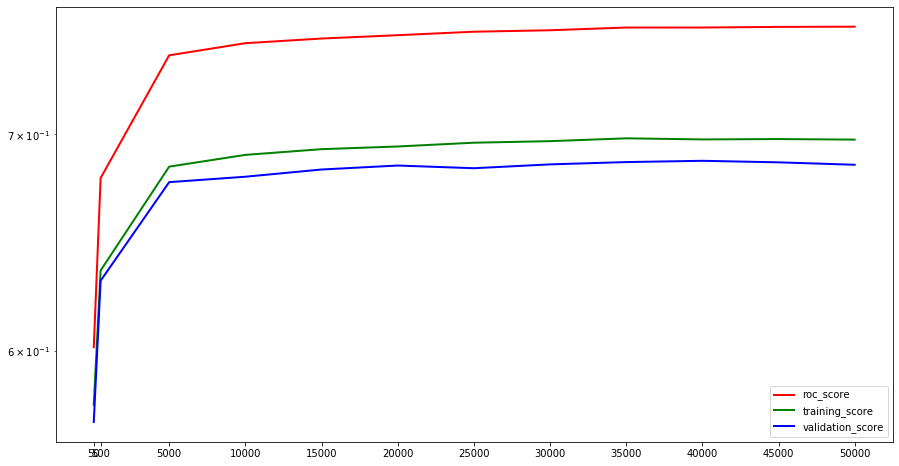

In [18]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(sizes, roc_scores, label='roc_score', linewidth=2, c='r')
plt.semilogy(sizes, training_scores, label='training_score', linewidth=2, c='g')
plt.semilogy(sizes, validation_scores, label='validation_score', linewidth=2, c='b')
plt.xticks(sizes)
plt.legend()
plt.show()

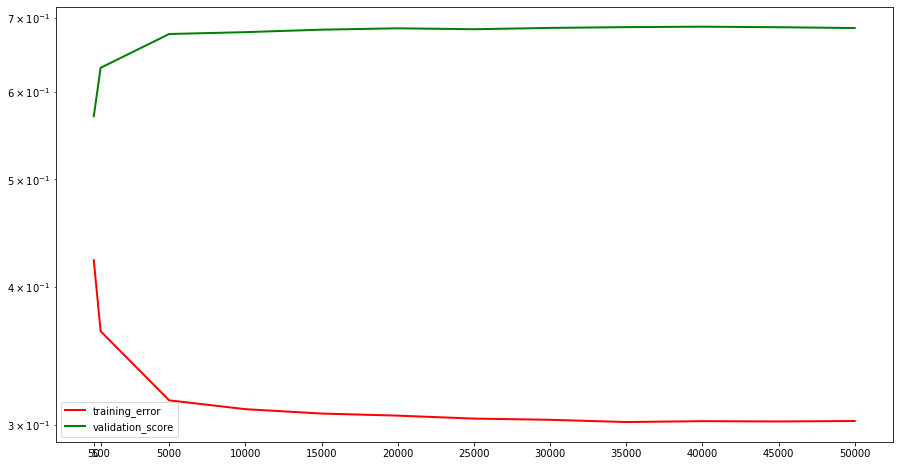

In [19]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(sizes, training_errors, label='training_error', linewidth=2, c='r')
plt.semilogy(sizes, validation_scores, label='validation_score', linewidth=2, c='g')
plt.xticks(sizes)
plt.legend()
plt.show()

In [12]:
ensembled_model = VotingClassifier(estimators=[('lr', lr), ('nn', mlp), ('gb', gb)],
                         voting='soft', flatten_transform=True)

thinner_sizes = [4500, 5000, 5500, 6000, 6500, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000]

thinner_roc_scores = []
thinner_training_errors = []
thinner_validation_errors = []
thinner_training_scores = []
thinner_validation_scores = []

for size in thinner_sizes:
    print("training with size of", size)
    ensembled_model.fit(Xtr[:size], Ytr[:size])
    
    roc = roc_auc_score(Yva, ensembled_model.predict_proba(Xva)[:,1])
    training_score = ensembled_model.score(Xtr, Ytr)
    validation_score = ensembled_model.score(Xva, Yva)
    training_error = 1-training_score
    validation_error = 1-validation_score
    print("roc score:", roc, "training_score:", training_score, "validation_score:", validation_score, "training_error:", training_error, "validation_error:", validation_error)
    
    thinner_roc_scores.append(roc)
    thinner_training_scores.append(training_score)
    thinner_validation_scores.append(validation_score)
    thinner_training_errors.append(training_error)
    thinner_validation_errors.append(validation_error)

training with size of 4500


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7436598224681483 training_score: 0.682163395424428 validation_score: 0.6811675729733109 training_error: 0.31783660457557195 validation_error: 0.3188324270266891
training with size of 5000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.745533176921815 training_score: 0.6856638329791224 validation_score: 0.6822301393837115 training_error: 0.31433616702087763 validation_error: 0.31776986061628854
training with size of 5500


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7452660190401557 training_score: 0.6851637704713089 validation_score: 0.6814175885992875 training_error: 0.31483622952869106 validation_error: 0.31858241140071253
training with size of 6000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7445160082888549 training_score: 0.6853981747718465 validation_score: 0.68160510031877 training_error: 0.3146018252281535 validation_error: 0.31839489968123
training with size of 6500


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7454705008194882 training_score: 0.6851481435179397 validation_score: 0.6819176198512407 training_error: 0.31485185648206027 validation_error: 0.31808238014875934
training with size of 7000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7462127387784293 training_score: 0.6853356669583698 validation_score: 0.6809800612538284 training_error: 0.3146643330416302 validation_error: 0.3190199387461716
training with size of 8000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7473008819252316 training_score: 0.6873359169896237 validation_score: 0.6811675729733109 training_error: 0.3126640830103763 validation_error: 0.3188324270266891
training with size of 9000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7493717895420902 training_score: 0.689742467808476 validation_score: 0.6853553347084193 training_error: 0.31025753219152397 validation_error: 0.31464466529158075
training with size of 10000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7516304546924252 training_score: 0.6900550068758595 validation_score: 0.6865429089318082 training_error: 0.3099449931241405 validation_error: 0.31345709106819175
training with size of 11000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7526026430679593 training_score: 0.6906175771971497 validation_score: 0.6862928933058317 training_error: 0.30938242280285033 validation_error: 0.31370710669416835
training with size of 12000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7522958248318417 training_score: 0.6910238779847481 validation_score: 0.6876054753422088 training_error: 0.30897612201525193 validation_error: 0.31239452465779116
training with size of 13000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7535588558067378 training_score: 0.6912270283785473 validation_score: 0.6880430026876679 training_error: 0.3087729716214527 validation_error: 0.31195699731233206
training with size of 14000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7536991642655428 training_score: 0.6926178272284036 validation_score: 0.6882305144071504 training_error: 0.3073821727715964 validation_error: 0.31176948559284956
training with size of 15000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7549529252298786 training_score: 0.6926334541817727 validation_score: 0.69048065504094 training_error: 0.3073665458182273 validation_error: 0.30951934495905997


In [13]:
thinner_roc_scores

[0.7436598224681483,
 0.745533176921815,
 0.7452660190401557,
 0.7445160082888549,
 0.7454705008194882,
 0.7462127387784293,
 0.7473008819252316,
 0.7493717895420902,
 0.7516304546924252,
 0.7526026430679593,
 0.7522958248318417,
 0.7535588558067378,
 0.7536991642655428,
 0.7549529252298786]

In [14]:
thinner_training_errors

[0.31783660457557195,
 0.31433616702087763,
 0.31483622952869106,
 0.3146018252281535,
 0.31485185648206027,
 0.3146643330416302,
 0.3126640830103763,
 0.31025753219152397,
 0.3099449931241405,
 0.30938242280285033,
 0.30897612201525193,
 0.3087729716214527,
 0.3073821727715964,
 0.3073665458182273]

In [15]:
thinner_validation_errors

[0.3188324270266891,
 0.31776986061628854,
 0.31858241140071253,
 0.31839489968123,
 0.31808238014875934,
 0.3190199387461716,
 0.3188324270266891,
 0.31464466529158075,
 0.31345709106819175,
 0.31370710669416835,
 0.31239452465779116,
 0.31195699731233206,
 0.31176948559284956,
 0.30951934495905997]

In [16]:
thinner_training_scores

[0.682163395424428,
 0.6856638329791224,
 0.6851637704713089,
 0.6853981747718465,
 0.6851481435179397,
 0.6853356669583698,
 0.6873359169896237,
 0.689742467808476,
 0.6900550068758595,
 0.6906175771971497,
 0.6910238779847481,
 0.6912270283785473,
 0.6926178272284036,
 0.6926334541817727]

In [17]:
thinner_validation_scores

[0.6811675729733109,
 0.6822301393837115,
 0.6814175885992875,
 0.68160510031877,
 0.6819176198512407,
 0.6809800612538284,
 0.6811675729733109,
 0.6853553347084193,
 0.6865429089318082,
 0.6862928933058317,
 0.6876054753422088,
 0.6880430026876679,
 0.6882305144071504,
 0.69048065504094]

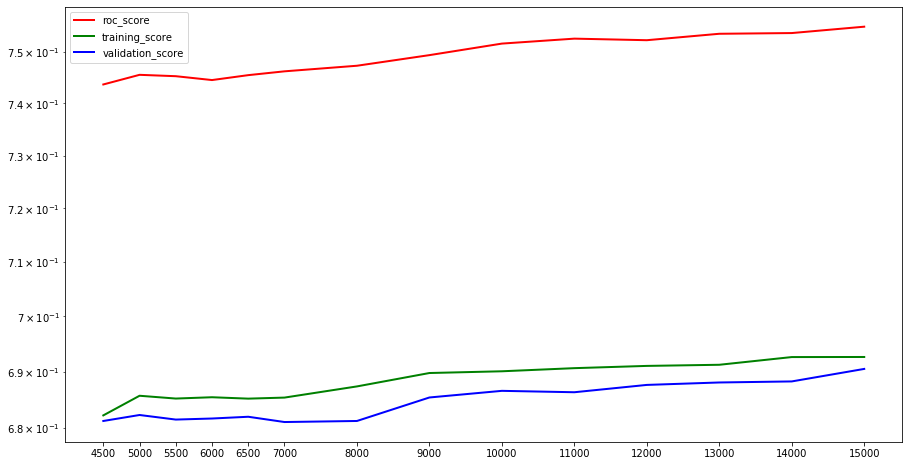

In [18]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(thinner_sizes, thinner_roc_scores, label='roc_score', linewidth=2, c='r')
plt.semilogy(thinner_sizes, thinner_training_scores, label='training_score', linewidth=2, c='g')
plt.semilogy(thinner_sizes, thinner_validation_scores, label='validation_score', linewidth=2, c='b')
plt.xticks(thinner_sizes)
plt.legend()
plt.show()

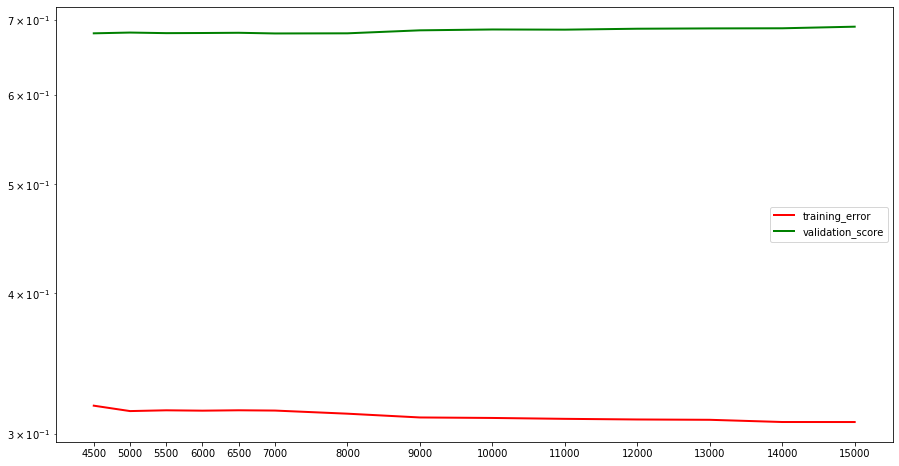

In [19]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(thinner_sizes, thinner_training_errors, label='training_error', linewidth=2, c='r')
plt.semilogy(thinner_sizes, thinner_validation_scores, label='validation_score', linewidth=2, c='g')
plt.xticks(thinner_sizes)
plt.legend()
plt.show()

In [20]:
ensembled_model = VotingClassifier(estimators=[('lr', lr), ('nn', mlp), ('gb', gb)],
                         voting='soft', flatten_transform=True)

second_sizes = [15000, 15500, 16000, 16500, 17000]

second_roc_scores = []
second_training_errors = []
second_validation_errors = []
second_training_scores = []
second_validation_scores = []

for size in second_sizes:
    print("training with size of", size)
    ensembled_model.fit(Xtr[:size], Ytr[:size])
    
    roc = roc_auc_score(Yva, ensembled_model.predict_proba(Xva)[:,1])
    training_score = ensembled_model.score(Xtr, Ytr)
    validation_score = ensembled_model.score(Xva, Yva)
    training_error = 1-training_score
    validation_error = 1-validation_score
    print("roc score:", roc, "training_score:", training_score, "validation_score:", validation_score, "training_error:", training_error, "validation_error:", validation_error)
    
    second_roc_scores.append(roc)
    second_training_scores.append(training_score)
    second_validation_scores.append(validation_score)
    second_training_errors.append(training_error)
    second_validation_errors.append(validation_error)

training with size of 15000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7552263268299909 training_score: 0.6931960245030628 validation_score: 0.6902931433214576 training_error: 0.30680397549693716 validation_error: 0.30970685667854236
training with size of 15500


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7559667649415208 training_score: 0.693024128016002 validation_score: 0.6907306706669167 training_error: 0.306975871983998 validation_error: 0.30926932933308326
training with size of 16000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7557088292868621 training_score: 0.692836604575572 validation_score: 0.6909806862928933 training_error: 0.30716339542442805 validation_error: 0.30901931370710667
training with size of 16500


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.7557884526249898 training_score: 0.6928834854356795 validation_score: 0.6920432527032939 training_error: 0.30711651456432054 validation_error: 0.3079567472967061
training with size of 17000


C:\Users\ShiYu Qiu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc score: 0.755534323727245 training_score: 0.6932897862232779 validation_score: 0.689668104256516 training_error: 0.30671021377672214 validation_error: 0.31033189574348397


In [21]:
second_roc_scores 

[0.7552263268299909,
 0.7559667649415208,
 0.7557088292868621,
 0.7557884526249898,
 0.755534323727245]

In [22]:
second_training_errors 

[0.30680397549693716,
 0.306975871983998,
 0.30716339542442805,
 0.30711651456432054,
 0.30671021377672214]

In [23]:
second_validation_errors

[0.30970685667854236,
 0.30926932933308326,
 0.30901931370710667,
 0.3079567472967061,
 0.31033189574348397]

In [24]:
second_training_scores

[0.6931960245030628,
 0.693024128016002,
 0.692836604575572,
 0.6928834854356795,
 0.6932897862232779]

In [25]:
second_validation_scores

[0.6902931433214576,
 0.6907306706669167,
 0.6909806862928933,
 0.6920432527032939,
 0.689668104256516]

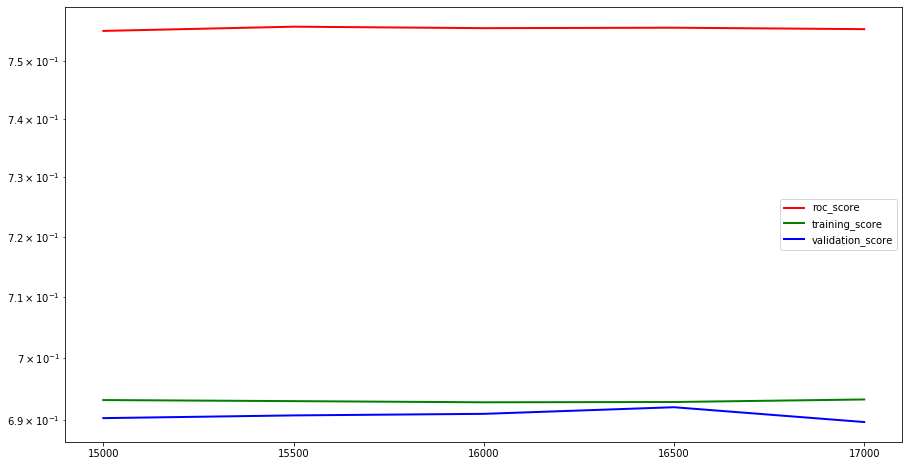

In [26]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(second_sizes, second_roc_scores, label='roc_score', linewidth=2, c='r')
plt.semilogy(second_sizes, second_training_scores, label='training_score', linewidth=2, c='g')
plt.semilogy(second_sizes, second_validation_scores, label='validation_score', linewidth=2, c='b')
plt.xticks(second_sizes)
plt.legend()
plt.show()

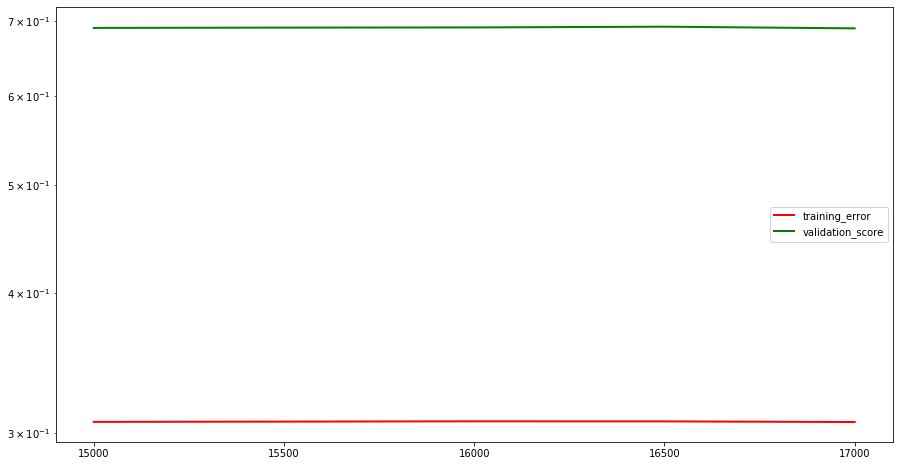

In [27]:
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.semilogy(second_sizes, second_training_errors, label='training_error', linewidth=2, c='r')
plt.semilogy(second_sizes, second_validation_scores, label='validation_score', linewidth=2, c='g')
plt.xticks(second_sizes)
plt.legend()
plt.show()